In [11]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [12]:
X = load_boston().data
Y = load_boston().target
df=pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3)
# applying column standardization on train and test data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
df_train=pd.DataFrame(X_train)
df_train['price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,1.162967,-0.490635,1.028421,-0.293069,0.360914,0.765674,1.123188,-1.081747,1.653282,1.521138,0.795832,-2.099366,1.068460,27.5
1,-0.007195,-0.490635,1.028421,-0.293069,1.413124,-1.869970,0.813659,-0.946479,1.653282,1.521138,0.795832,-0.512163,0.233932,21.9
2,-0.378396,-0.490635,-0.073669,-0.293069,-0.578249,-1.243499,-2.123273,-0.080913,-0.646823,-0.786434,0.053475,-0.130082,2.479074,23.7
3,-0.408305,2.812139,-1.332782,-0.293069,-1.047830,0.462903,-1.407036,2.162475,-0.646823,-0.768638,-0.688882,0.357797,-0.922569,24.5
4,-0.385998,-0.490635,-0.613708,-0.293069,-0.934783,-0.978399,-0.244500,1.098298,-0.761829,-1.047444,-0.271306,0.427012,0.551572,19.4


### Costom stochasticGradientDescent

In [14]:
def StochasticGradientDesent(train_data,learning_rate=0.01,itr=750,sample_s=25):
    weight=np.zeros(shape=(1,train_data.shape[1]-1))
    intercept=0
    lr_rate=learning_rate
    for i in range(1,itr):
        w_old=weight
        intercept_old=intercept
        weigt=np.zeros(shape=(1,train_data.shape[1]-1))
        itecpt=0
        train_set=train_data.sample(sample_s)
        train_y=np.array(train_set['price'])
        train_x=np.array(train_set.drop('price',axis=1))
        for j in range(sample_s):
            weigt+=train_x[j]*(train_y[j]-(np.dot(w_old,train_x[j])+intercept))*(-2)
            itecpt+=(train_y[j]-(np.dot(w_old,train_x[j])+intercept))*(-2)
        weight=(w_old-(lr_rate*weigt)/sample_s)
        intercept=(intercept_old-(lr_rate*itecpt)/sample_s)
        if (w_old==weight).all():
            break
        return weight,intercept
w,b=StochasticGradientDesent(df_train)
print(w)
print(b)

[[-0.02532287  0.16047432 -0.03347209  0.13288429 -0.04400233 -0.00497934
  -0.24033042  0.0558579  -0.06610202 -0.04911275 -0.12412294  0.10136229
  -0.01650802]]
[0.4336]


Mean squared Error 519.9717548203397


Text(0.5, 1.0, 'Predicted VS Actual Value Graph')

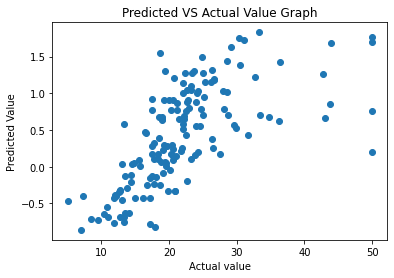

In [15]:
def predict(x,w,b):
    """predict the price"""
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return y_pred
test_pred_cstm=predict(X_test,w,b)
mse_error=mean_squared_error(y_test,test_pred_cstm)
print("Mean squared Error {}".format(mse_error))
plt.scatter(y_test,test_pred_cstm)
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Predicted VS Actual Value Graph")

### scikit-learn SGD Regression

In [16]:
reg=SGDRegressor()
train_data=df_train.drop(['price'],axis=1)
reg.fit(train_data,y_train)
test_pred_sgd=reg.predict(X_test)
mse_Error=mean_squared_error(y_test,test_pred_sgd)
print ("Mean Squared Error {}".format(mse_Error))

Mean Squared Error 21.435042658928797


Text(0.5, 1.0, 'Actual vs Predicted value Graph')

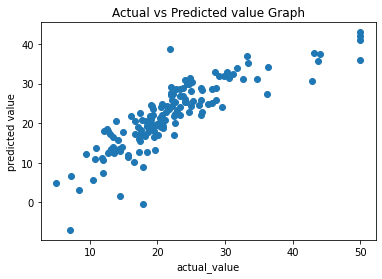

In [17]:
plt.scatter(y_test,test_pred_sgd)
plt.xlabel("actual_value")
plt.ylabel("predicted value")
plt.title('Actual vs Predicted value Graph')

### Comparing coustomSGD with SklearnSGD

In [18]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=['customSGD','SGDRegressor']
W=reg.coef_
for i in range(12):
    table.add_row([w[0][i],W[i]])
print(table)


+-----------------------+-----------------------+
|       customSGD       |      SGDRegressor     |
+-----------------------+-----------------------+
|  -0.02532286671103752 |  -1.1531027386125825  |
|   0.1604743247747556  |   0.8738732195723875  |
|  -0.03347209472826948 | -0.014835031936899192 |
|   0.1328842852705571  |   0.7323652450712819  |
|  -0.04400233463381027 |   -1.837818686329121  |
| -0.004979340915119264 |   2.6893714176142796  |
|  -0.2403304238628225  |  0.08457397181091333  |
|  0.05585789735463294  |   -2.884612620699346  |
|  -0.06610201636809125 |   2.462398343277307   |
| -0.049112751906016036 |  -1.3338777912794144  |
|  -0.12412293765448901 |   -2.239976074184658  |
|   0.1013622929781616  |   0.8736535695412886  |
+-----------------------+-----------------------+


In [19]:
table1=PrettyTable()
table1.field_names=['MSE of customSGD','MSE of ScikitSGD']
table1.add_row([mse_error,mse_Error])
print(table1)

+-------------------+--------------------+
|  MSE of customSGD |  MSE of ScikitSGD  |
+-------------------+--------------------+
| 519.9717548203397 | 21.435042658928797 |
+-------------------+--------------------+


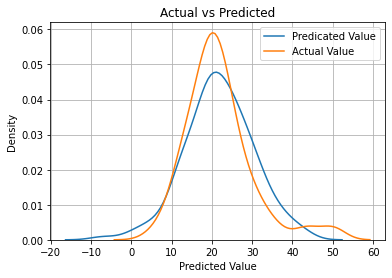

In [22]:
import seaborn as sns
sns.kdeplot(test_pred_sgd,label='Predicated Value')
sns.kdeplot(y_test,label='Actual Value')
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Value')
plt.ylabel('Density')
plt.grid()

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))